In [1]:
import pm4py
import pandas as pd

#convert .jsonl to .xes (eXtensible Event Stream)
#ISO standard format for event logs used in process mining
#It has a well-defined schema that represents events, attributes, and their relationships, ensuring compatibility across tools
ocel =pm4py.read_ocel_json('../global/itam_ocel.jsonl')
xes = pm4py.read_xes("itam_ocel_xes.xes")
# print(xes)
print(xes)

parsing log, completed traces ::   0%|          | 0/37 [00:00<?, ?it/s]

    ocel:eid            time:timestamp  concept:name  \
0      44378 2024-03-25 08:50:29+00:00      checkout   
1      44381 2024-03-25 08:51:47+00:00      accepted   
2      44392 2024-03-25 09:11:10+00:00  checkin from   
3      44403 2024-03-25 09:27:13+00:00        update   
4      44412 2024-03-25 10:47:22+00:00      checkout   
..       ...                       ...           ...   
143    44565 2024-03-25 17:17:21+00:00      checkout   
144    44566 2024-03-25 17:18:15+00:00      accepted   
145    44572 2024-03-25 17:29:58+00:00      checkout   
146    44573 2024-03-25 17:30:42+00:00      accepted   
147    44574 2024-03-25 17:31:02+00:00      accepted   

                                              log_meta           action_date  \
0              {"location_id":{"old":1490,"new":null}}  2024-03-25T08:50:29Z   
1                                                  NaN                   NaN   
2    {"status_id":{"old":11,"new":"13"},"location_i...  2024-03-25T09:11:10Z   
3      

In [2]:
#View log data indexes
xes.head()

,ocel:eid,time:timestamp,concept:name,log_meta,action_date,action_source,filename,note,case:concept:name,case:ocel:type,...,case:name,case:asset_tag,case:physical,case:last_checkout,case:last_checkin,case:checkin_counter,case:checkout_counter,case:model.name,case:model.manufacturer.name,case:requestable
0,44378,2024-03-25 08:50:29+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:50:29Z,gui,NaN,NaN,L1,item_asset,...,tintenklecks,L1,1,2024-03-25T17:19:16Z,2024-03-25T17:11:18Z,5,6,Latitude E7450,Dell,NaN
1,44381,2024-03-25 08:51:47+00:00,accepted,NaN,NaN,NaN,accepted-eula-2024-03-25-07-51-47.pdf,NaN,L1,item_asset,...,tintenklecks,L1,1,2024-03-25T17:19:16Z,2024-03-25T17:11:18Z,5,6,Latitude E7450,Dell,NaN
2,44392,2024-03-25 09:11:10+00:00,checkin from,"{""status_id"":{""old"":11,""new"":""13""},""location_i...",2024-03-25T09:11:10Z,gui,NaN,checked in for repair by client 1,L1,item_asset,...,tintenklecks,L1,1,2024-03-25T17:19:16Z,2024-03-25T17:11:18Z,5,6,Latitude E7450,Dell,NaN
3,44403,2024-03-25 09:27:13+00:00,update,"{""status_id"":{""old"":13,""new"":""11""}}",NaN,gui,NaN,NaN,L1,item_asset,...,tintenklecks,L1,1,2024-03-25T17:19:16Z,2024-03-25T17:11:18Z,5,6,Latitude E7450,Dell,NaN
4,44412,2024-03-25 10:47:22+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T10:47:22Z,gui,NaN,Mousepad slightly dirty,L1,item_asset,...,tintenklecks,L1,1,2024-03-25T17:19:16Z,2024-03-25T17:11:18Z,5,6,Latitude E7450,Dell,NaN


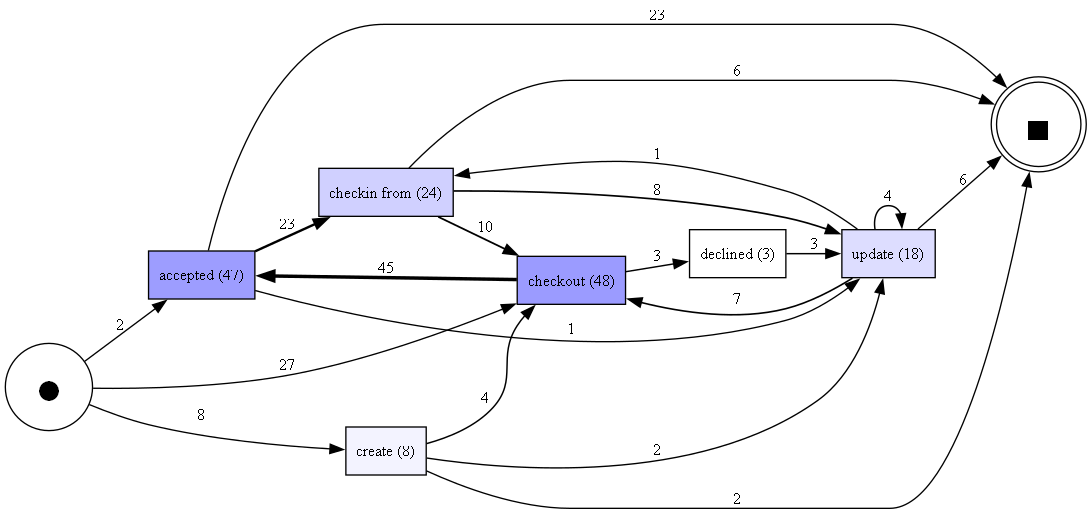

In [3]:
dfg, start_activities, end_activities = pm4py.discover_dfg(xes, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

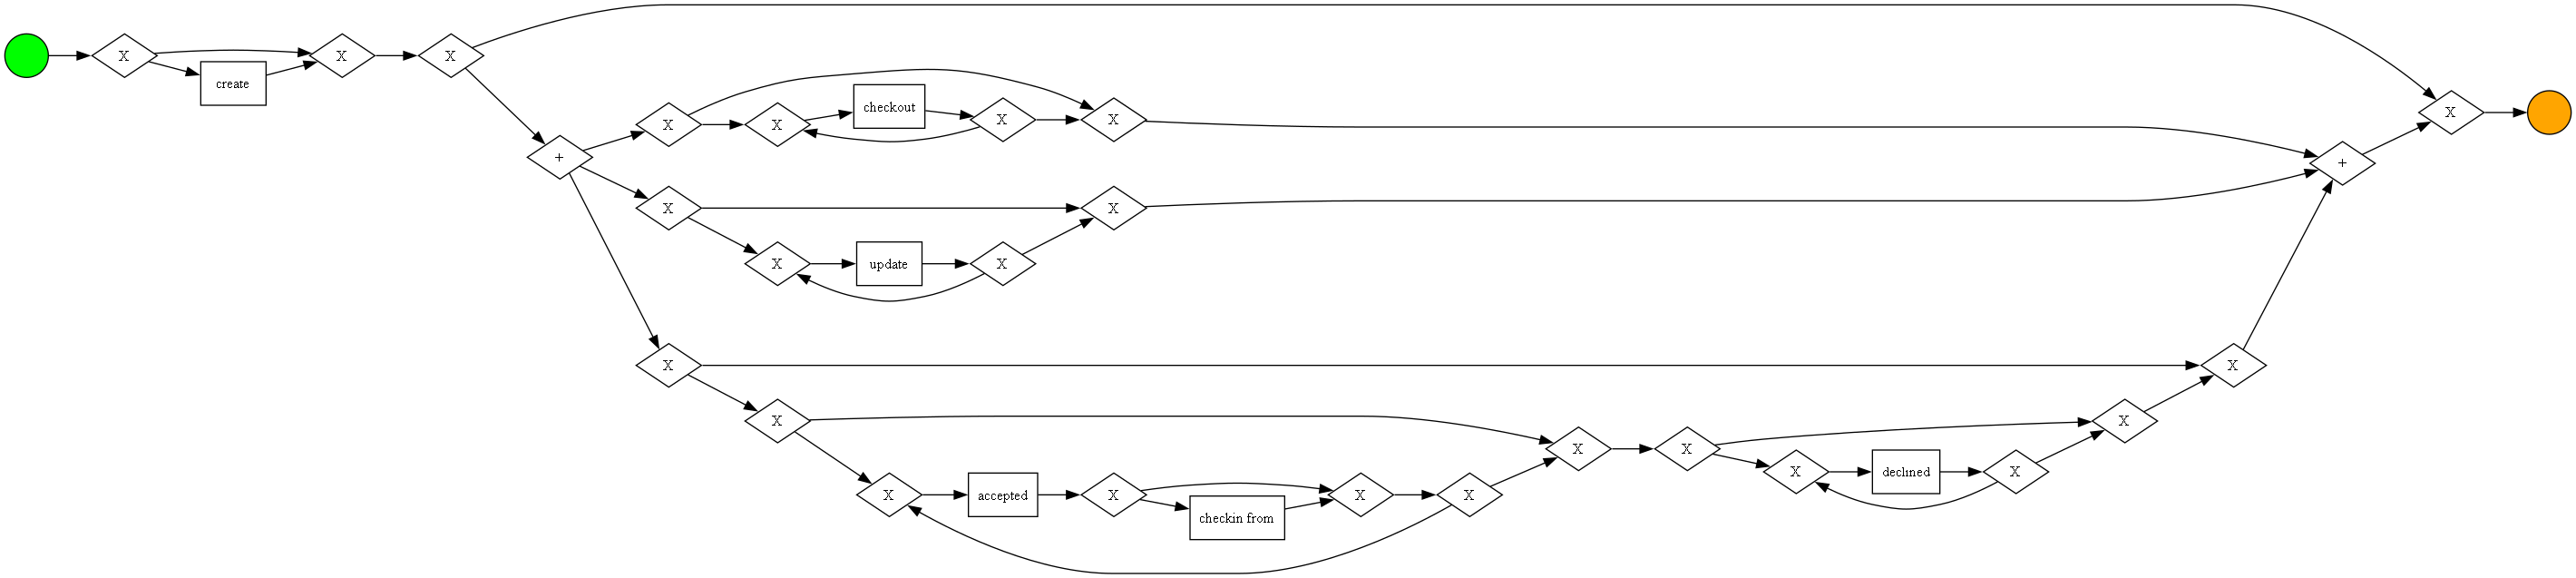

In [4]:
bpmn = pm4py.discover_bpmn_inductive(xes)
pm4py.vis.view_bpmn(bpmn)

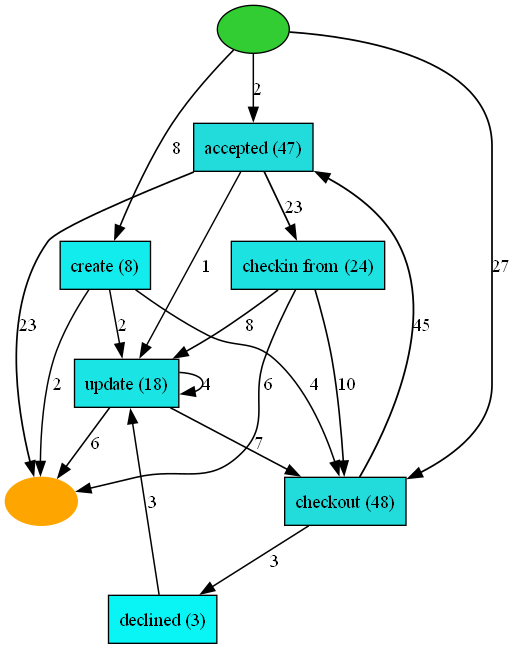

In [5]:
heuristics_net = pm4py.discover_heuristics_net(xes)
pm4py.vis.view_heuristics_net(heuristics_net)

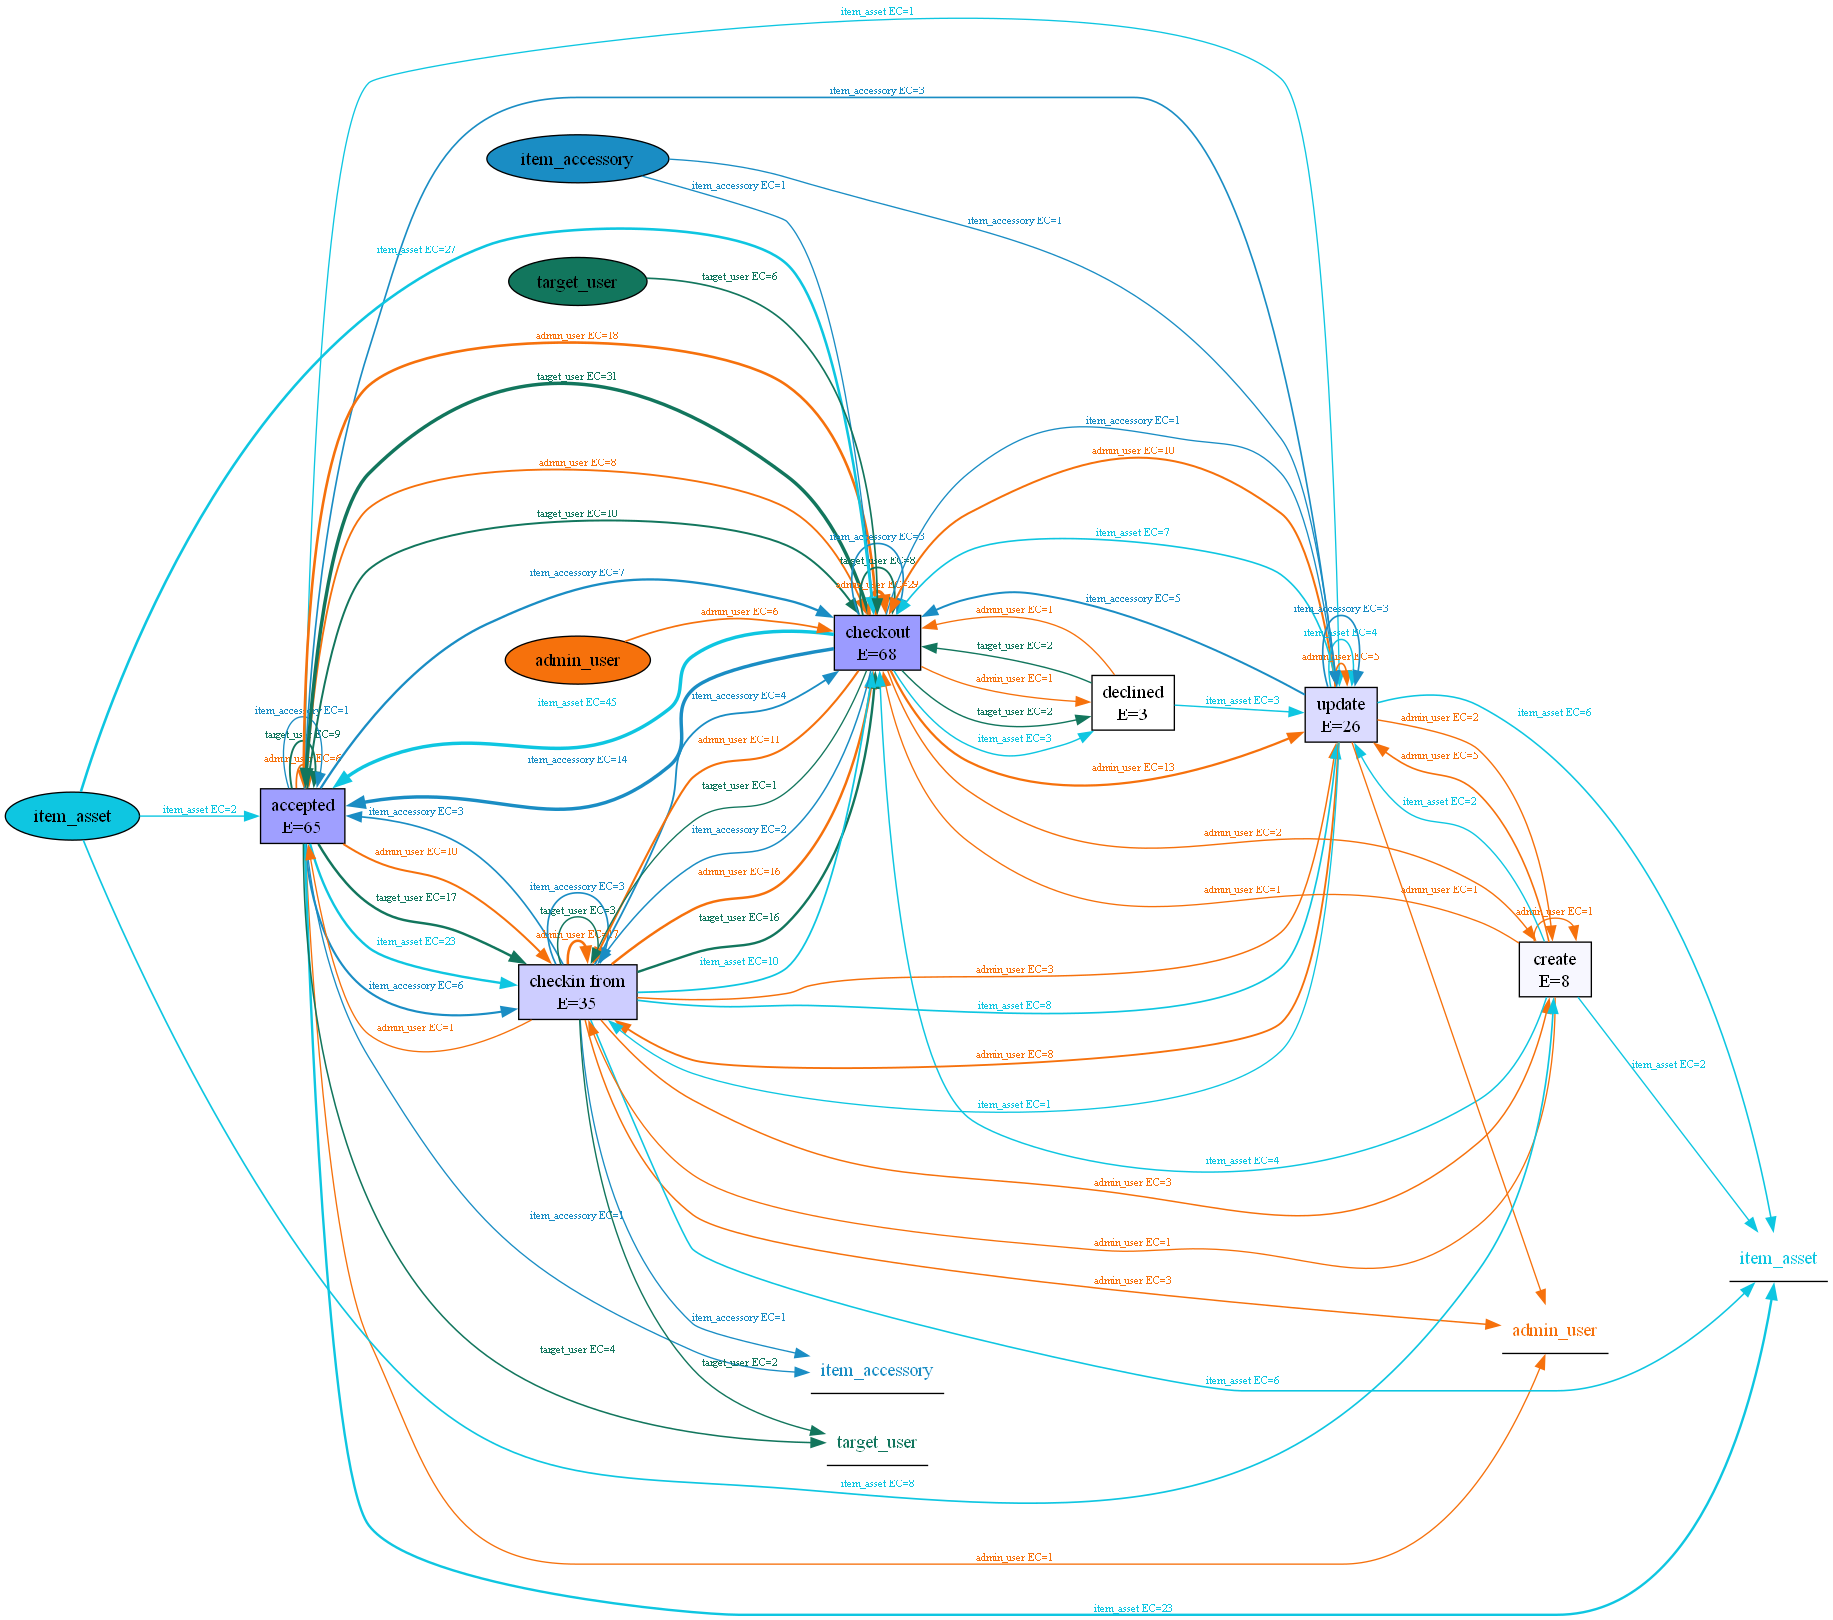

In [8]:
ocel_viz = pm4py.discover_ocdfg(ocel)
pm4py.vis.view_ocdfg(ocel_viz)

In [6]:
count = 1
for variant, subdf in pm4py.split_by_process_variant(xes):
    print(f"Variante: {count}")
    print(variant)
    count += 1;

Variante: 1
('checkout', 'accepted', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'checkin from', 'checkout', 'accepted')
Variante: 2
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted')
Variante: 3
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'update', 'update', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from')
Variante: 4
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'checkin from', 'update')
Variante: 5
('create', 'checkout', 'accepted', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from', 'update')
Variante: 6
('create', 'update', 'update')
Variante: 7
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'checkin from', 'update', 'checkout', 'declined', 'update', 'update', 'checkout', 'declined', 'update')
Variante: 8
('create', 'checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'check

In [7]:
print(f"Anzahl der Variante: {count - 1}")

Anzahl der Variante: 17
